# Time Series: Part 2

## Data and Imports

In [7]:
import pandas as pd

In [9]:
sp500 = pd.read_pickle('sp500.pkl')

In [11]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 1 to 1257
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1257 non-null   datetime64[ns]
 1   Open      1257 non-null   float64       
 2   High      1257 non-null   float64       
 3   Low       1257 non-null   float64       
 4   Close     1257 non-null   float64       
 5   Volume    1257 non-null   int64         
 6   Year      1257 non-null   int32         
 7   Month     1257 non-null   int32         
 8   Day       1257 non-null   int32         
 9   Day_name  1257 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 93.3+ KB


## Setting Date As Index

In [14]:
## Now lets set the 'Date' column to be the index of the dataframe.
## Recall the index is the row of the dataframe. 
## Generally its in numeric order but when working with time series datasets setting the timeseries to be the index can be helpful
sp500=sp500.set_index('Date')

In [16]:
sp500.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Day_name
Date,,,,,,,,,
2021-12-22,4650.36,4697.67,4645.53,4696.56,2439570000,2021,12,22,Wednesday
2021-12-21,4594.96,4651.14,4583.16,4649.23,2564370000,2021,12,21,Tuesday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday


In [18]:
## Since 'Date' was set to be the index it sorted itself into descending order with the most recent dates being first
sp500.index

DatetimeIndex(['2021-12-22', '2021-12-21', '2021-12-20', '2021-12-17',
               '2021-12-16', '2021-12-15', '2021-12-14', '2021-12-13',
               '2021-12-10', '2021-12-09',
               ...
               '2017-01-10', '2017-01-09', '2017-01-06', '2017-01-05',
               '2017-01-04', '2017-01-03', '2016-12-30', '2016-12-29',
               '2016-12-28', '2016-12-27'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [20]:
## Lets be sure the above sorting is try by just sorting the index ourselves but in reverse order
## By default the ascending parameter will be 'True' so no need to write it but did so anyway for clarity

sp500=sp500.sort_index(ascending=True)

In [24]:
## Notice the index order
sp500.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1987080000,2016,12,27,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-03,2251.57,2263.88,2245.13,2257.83,3770530000,2017,1,3,Tuesday


## Subset The Data Based On Index

### loc: lable based indexing

In [40]:
sp500

,Open,High,Low,Close,Volume,Year,Month,Day,Day_name
Date,,,,,,,,,
2016-12-27,2266.23,2273.82,2266.15,2268.88,1987080000,2016,12,27,Tuesday
2016-12-28,2270.23,2271.31,2249.11,2249.92,2392360000,2016,12,28,Wednesday
2016-12-29,2249.50,2254.51,2244.56,2249.26,2336370000,2016,12,29,Thursday
2016-12-30,2251.61,2253.58,2233.62,2238.83,2670900000,2016,12,30,Friday
2017-01-03,2251.57,2263.88,2245.13,2257.83,3770530000,2017,1,3,Tuesday
...,...,...,...,...,...,...,...,...,...
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday


In [38]:
## Recall that loc is based on the lable of the index, meaning the physical lable names of the record
## So if we wanted the first record have to search '2016-12-27'

sp500.loc['2016-12-27']

Open           2266.23
High           2273.82
Low            2266.15
Close          2268.88
Volume      1987080000
Year              2016
Month               12
Day                 27
Day_name       Tuesday
Name: 2016-12-27 00:00:00, dtype: object

In [42]:
## If we wanted the last  record have to search '2021-12-22'

sp500.loc['2021-12-22']

Open           4650.36
High           4697.67
Low            4645.53
Close          4696.56
Volume      2439570000
Year              2021
Month               12
Day                 22
Day_name     Wednesday
Name: 2021-12-22 00:00:00, dtype: object

In [53]:
## What if we wanted all data for December 2021?

sp500.loc['2021-12-01': '2021-12-31']

,Open,High,Low,Close,Volume,Year,Month,Day,Day_name
Date,,,,,,,,,
2021-12-01,4602.82,4652.94,4510.27,4513.04,4078260000,2021,12,1,Wednesday
2021-12-02,4504.73,4595.46,4504.73,4577.10,3771510000,2021,12,2,Thursday
2021-12-03,4589.49,4608.03,4495.12,4538.43,3971500000,2021,12,3,Friday
2021-12-06,4548.37,4612.60,4540.51,4591.67,3305690000,2021,12,6,Monday
2021-12-07,4631.97,4694.04,4631.97,4686.75,3334320000,2021,12,7,Tuesday
2021-12-08,4690.86,4705.06,4674.52,4701.21,3061550000,2021,12,8,Wednesday
2021-12-09,4691.00,4695.26,4665.98,4667.45,2851660000,2021,12,9,Thursday
2021-12-10,4687.64,4713.57,4670.24,4712.02,2858310000,2021,12,10,Friday
2021-12-13,4710.30,4710.30,4667.60,4668.97,3322050000,2021,12,13,Monday


In [57]:
## We can also simplify the above by using:
## We can do this because date is the index and it is a time series which has all records in a particular format

sp500.loc['2021-12']

,Open,High,Low,Close,Volume,Year,Month,Day,Day_name
Date,,,,,,,,,
2021-12-01,4602.82,4652.94,4510.27,4513.04,4078260000,2021,12,1,Wednesday
2021-12-02,4504.73,4595.46,4504.73,4577.10,3771510000,2021,12,2,Thursday
2021-12-03,4589.49,4608.03,4495.12,4538.43,3971500000,2021,12,3,Friday
2021-12-06,4548.37,4612.60,4540.51,4591.67,3305690000,2021,12,6,Monday
2021-12-07,4631.97,4694.04,4631.97,4686.75,3334320000,2021,12,7,Tuesday
2021-12-08,4690.86,4705.06,4674.52,4701.21,3061550000,2021,12,8,Wednesday
2021-12-09,4691.00,4695.26,4665.98,4667.45,2851660000,2021,12,9,Thursday
2021-12-10,4687.64,4713.57,4670.24,4712.02,2858310000,2021,12,10,Friday
2021-12-13,4710.30,4710.30,4667.60,4668.97,3322050000,2021,12,13,Monday


In [62]:
## What if we wanted all data for November & December 2021?
## Just subsetting by just the year and month works because loc is inclusive, meaning it will grab all data that fits

sp500.loc['2021-11':'2021-12']

,Open,High,Low,Close,Volume,Year,Month,Day,Day_name
Date,,,,,,,,,
2021-11-01,4610.62,4620.34,4595.06,4613.67,2924000000,2021,11,1,Monday
2021-11-02,4613.34,4635.15,4613.34,4630.65,3309690000,2021,11,2,Tuesday
2021-11-03,4630.65,4663.46,4621.19,4660.57,3339440000,2021,11,3,Wednesday
2021-11-04,4662.93,4683.00,4662.59,4680.06,3332940000,2021,11,4,Thursday
2021-11-05,4699.26,4718.50,4681.32,4697.53,3491150000,2021,11,5,Friday
2021-11-08,4701.48,4714.92,4694.39,4701.70,3465720000,2021,11,8,Monday
2021-11-09,4707.25,4708.53,4670.87,4685.25,3110230000,2021,11,9,Tuesday
2021-11-10,4670.26,4684.85,4630.86,4646.71,3581630000,2021,11,10,Wednesday
2021-11-11,4659.39,4664.55,4648.31,4649.27,2623140000,2021,11,11,Thursday


In [64]:
## What if we wanted all data for 2021?
## As mentioned loc is inclusive so just having the year will get all indexes with the '2021' year string

sp500.loc['2021']

,Open,High,Low,Close,Volume,Year,Month,Day,Day_name
Date,,,,,,,,,
2021-01-04,3764.61,3769.99,3662.71,3700.65,5006680000,2021,1,4,Monday
2021-01-05,3698.02,3737.83,3695.07,3726.86,4582620000,2021,1,5,Tuesday
2021-01-06,3712.20,3783.04,3705.34,3748.14,6049970000,2021,1,6,Wednesday
2021-01-07,3764.71,3811.55,3764.71,3803.79,5080870000,2021,1,7,Thursday
2021-01-08,3815.05,3826.69,3783.60,3824.68,4764180000,2021,1,8,Friday
...,...,...,...,...,...,...,...,...,...
2021-12-16,4719.13,4731.99,4651.89,4668.67,3592810000,2021,12,16,Thursday
2021-12-17,4652.50,4666.70,4600.22,4620.64,5609780000,2021,12,17,Friday
2021-12-20,4587.90,4587.90,4531.10,4568.02,3395780000,2021,12,20,Monday


In [ ]:
## We can also be very specific with what we want:
## Lets say we want all dates from Jan 1st to Feb 2nd

sp500.loc['2021-01':'2021-02-02']

In [72]:
## Now lets say we want all data from 2020-2021 but just the 'Close' column
## Recall you can just put '2020': to mean you want all the data from 2020 until the end of the dataset
## Let set the specific columns you want after the subset

sp500.loc['2020':,'Close']

Date
2020-01-02    3257.85
2020-01-03    3234.85
2020-01-06    3246.28
2020-01-07    3237.18
2020-01-08    3253.05
               ...   
2021-12-16    4668.67
2021-12-17    4620.64
2021-12-20    4568.02
2021-12-21    4649.23
2021-12-22    4696.56
Name: Close, Length: 499, dtype: float64

In [76]:
## Now lets say we want all data from 2020-2021 but just the 'Open' and 'Close' columns
## Put the columns you want into []

sp500.loc['2020':,['Open','Close']]

,Open,Close
Date,,
2020-01-02,3244.67,3257.85
2020-01-03,3226.36,3234.85
2020-01-06,3217.55,3246.28
2020-01-07,3241.86,3237.18
2020-01-08,3238.59,3253.05
...,...,...
2021-12-16,4719.13,4668.67
2021-12-17,4652.50,4620.64
2021-12-20,4587.90,4568.02


### Line Plot

<Axes: xlabel='Date'>

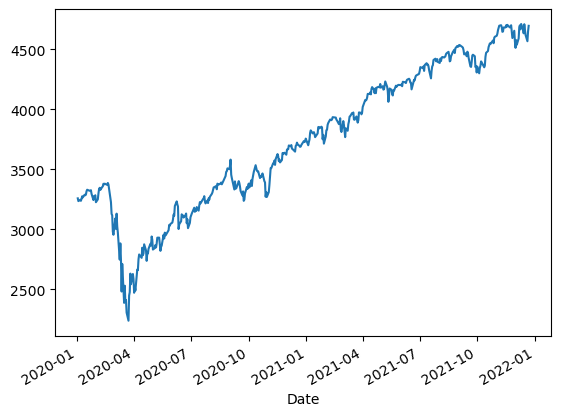

In [82]:
## Now lets say we want all data from 2020-2021 but just the 'Close' column and we wnat it as a Line Plot
## we can now view the closing times over many dates


sp500.loc['2020':,'Close'].plot()